In [1]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
from os.path import join
import torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from os.path import join as oj
import torch.utils.data as utils
from torchvision import datasets, transforms
import numpy as np
import os
import sys
pd.set_option('precision', 3)

In [102]:
save_path = "../results_for_export"
trained_model_folder = '../models/MNIST'
fnames = [oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]
# other models were trained badly

results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() 
results['final_acc'] = [max(x) for x in results['accs_test']] 
results = results[results.method!= "ExpectedGrad"]

/home/lauri/.conda/envs/gpu_usage/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [103]:
results['final_acc'] = [max(x) for x in results['accs_test']] 
results['final_acc_train'] = [max(x) for x in results['accs_train']]
results['final_cd'] = [x[-1] for x in results['cd']]
results['final_test_loss'] = [min(x) for x in results['losses_test']]
results['final_train_loss'] = [min(x) for x in results['losses_train']]
results['acc_color'] = [0 for x in results['accs_train']]


# results = results.dropna()

In [104]:
results = results[results.dataset == "Color"]

In [105]:


results.reset_index(drop=True, inplace=True)
results_save = results[['regularizer_rate','final_acc','final_acc_train','final_test_loss', 'acc_color','final_cd', 'method', 'dataset']].sort_values(by = ['regularizer_rate'])

In [106]:
concise_results = results_save.groupby(by = ['dataset', 'method','regularizer_rate']).mean()
concise_results.columns = ['Test accuracy', 'Train accuracy', 'Test loss', 'Color accuracy', 'CD']
# with open(oj(save_path, "color_mnist.text"), 'w') as f:
#           f.write(concise_results.to_latex())

In [107]:
concise_results

Test accuracy  Train accuracy  Test loss  \
dataset method     regularizer_rate                                             
Color   CDEP       0.0                    2.57e-01          100.00      31.03   
                   0.1                    2.88e+00          100.00      26.30   
                   1.0                    5.47e+00          100.00      18.93   
                   5.0                    1.38e+01           99.93      13.54   
                   10.0                   1.67e+01           99.93      11.18   
                   50.0                   2.23e+01           99.28       6.51   
                   100.0                  2.29e+01           98.24       5.26   
                   500.0                  2.51e+01           93.68       3.25   
                   1000.0                 2.31e+01           90.76       2.59   
                   5000.0                 2.49e+01           99.74       7.31   
        EGradients 0.1                    8.83e-02          100.00      23.22   
                   1.0                    9.68e-01          100.00      27.96   
                   500.0                  7.17e-02          100.00      22.63   
                   1000.0                 4.16e+00          100.00      18.77   
                   5000.0                 1.30e-01          100.00      24.14   
        Grad       0.0                    2.66e-01          100.00      27.03   
                   0.1                    2.74e+00          100.00      21.89   
                   1.0                    5.00e-02          100.00      26.65   
                   5.0                    1.90e-01          100.00      27.09   
                   10.0                   2.48e-01          100.00      26.96   
                   50.0                   2.75e-01          100.00      26.83   
                   100.0                  2.90e-01          100.00      27.02   
                   500.0                  3.27e-01          100.00      27.85   
                   1000.0                 2.47e-01          100.00      27.34   
                   5000.0                 5.00e-03          100.00      21.27   

                                     Color accuracy        CD  
dataset method     regularizer_rate                            
Color   CDEP       0.0                            0  0.00e+00  
                   0.1                            0  6.50e-04  
                   1.0                            0  7.45e-10  
                   5.0                            0  1.79e-17  
                   10.0                           0  5.06e-20  
                   50.0                           0  2.23e-22  
                   100.0                          0  3.63e-23  
                   500.0                          0  1.89e-24  
                   1000.0                         0  6.76e-25  
                   5000.0                         0  1.21e-22  
        EGradients 0.1                            0  0.00e+00  
                   1.0                            0  0.00e+00  
                   500.0                          0  0.00e+00  
                   1000.0                         0  0.00e+00  
                   5000.0                         0  0.00e+00  
        Grad       0.0                            0  0.00e+00  
                   0.1                            0  9.54e-11  
                   1.0                            0  1.03e-10  
                   5.0                            0  1.24e-10  
                   10.0                           0  1.13e-10  
                   50.0                           0  1.28e-10  
                   100.0                          0  1.39e-10  
                   500.0                          0  1.42e-10  
                   1000.0                         0  1.28e-10  
                   5000.0                         0  1.29e-10

In [98]:
concise_results_for_save = concise_results[['Test accuracy']]#, 'Color accuracy']]

In [99]:
concise_results_for_save

Test accuracy
dataset method     regularizer_rate               
Color   CDEP       0.0                        0.26
                   0.1                        2.88
                   1.0                        5.47
                   5.0                       13.75
                   10.0                      16.69
                   50.0                      22.28
                   100.0                     22.90
                   500.0                     25.12
                   1000.0                    23.09
                   5000.0                    24.90
        EGradients 0.1                        0.00
                   1.0                        0.00
                   500.0                      0.00
                   1000.0                     0.00
                   5000.0                     0.00
        Grad       0.0                        0.27
                   0.1                        0.00
                   1.0                        0.05
                   5.0                        0.19
                   10.0                       0.25
                   50.0                       0.27
                   100.0                      0.29
                   500.0                      0.33
                   1000.0                     0.25
                   5000.0                     0.00

In [67]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.conv2_drop = nn.Dropout2d()

        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    def logits(self, x):
    
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)
        return x


In [18]:
def test( model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    return(test_loss, 100.*correct / len(test_loader.dataset))


In [19]:
kwargs = {'num_workers': 1, 'pin_memory': True}
test_x_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "test_x.npy")))
test_y_color= torch.Tensor(np.load(oj("../data/ColorMNIST", "test_y.npy"))).type(torch.int64)
test_dataset_color = utils.TensorDataset(test_x_tensor,test_y_color) # create your datset

test_loader_color = utils.DataLoader(test_dataset_color,
        batch_size=256, shuffle=True, **kwargs) # create your dataloader

test_net = Net()
test_net = test_net.to(0)

In [20]:
acc_color_list = []
loss_color_list = []
for i in range(len(results)):
    test_net.load_state_dict(results.model_weights[i])
    loss_col, acc_col = test(test_net, 0, test_loader_color, 0)
    acc_color_list.append(acc_col)
    loss_color_list.append(loss_col)
results["final_acc"] =[x for x in acc_color_list]
results["final_test_loss"] =[x for x in loss_color_list]               
               


In [36]:
kwargs = {'num_workers': 1, 'pin_memory': True}
test_x_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "test_x.npy")))
test_y_color= torch.Tensor(np.load(oj("../data/ColorMNIST", "test_y.npy"))).type(torch.int64)
test_dataset_color = utils.TensorDataset(test_x_tensor,test_y_color) # create your datset

test_loader_color = utils.DataLoader(test_dataset_color,
        batch_size=256, shuffle=True, **kwargs) # create your dataloader

test_net = Net()
test_net = test_net.to(0)

In [39]:
acc_color_list = []
loss_color_list = []
for i in tqdm(range(len(results))):
    test_net.load_state_dict(results.model_weights[i])
    loss_col, acc_col = test(test_net, 0, test_loader_color, 0)
    acc_color_list.append(acc_col)
    loss_color_list.append(loss_col)
results["acc_color"] =[x for x in acc_color_list]
results["loss_color"] =[x for x in loss_color_list]               
               


100%|██████████| 109/109 [00:48<00:00,  2.23it/s]


In [68]:
pd.set_option('precision', 2)

In [69]:
plot_results = results[['method', 'regularizer_rate',"final_acc"]].groupby(by = ['method','regularizer_rate']).mean()

In [73]:
results = results[results.regularizer_rate < 5000]

In [92]:
sns.set()

In [96]:
sns.reset_defaults()

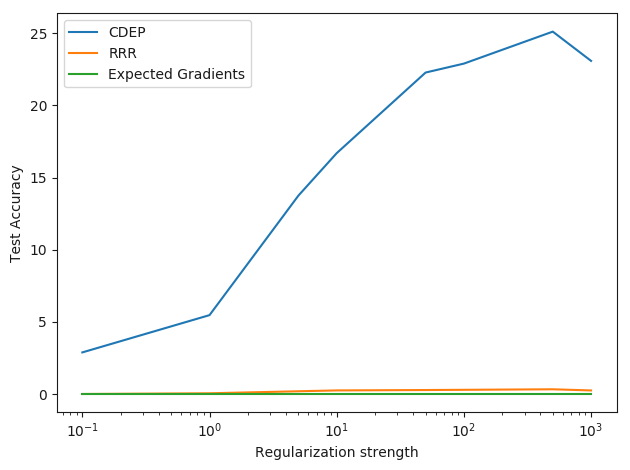

In [97]:
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results[results.method == 'CDEP'],label="CDEP",ci=None ,legend = "brief"  );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results[results.method == 'Grad'], label="RRR" ,ci=None );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results[results.method == 'EGradients'], label="Expected Gradients",ci=None  );
plot.set(xscale="log")
#plot.set(yscale="log")
plot.set_xlabel("Regularization strength")
plot.set_ylabel("Test Accuracy")
plot.set_title("");
fig  = plot.get_figure()
fig.tight_layout()
fig.savefig(oj(save_path,"ColorMNIST_results"))